In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

# Read Data

In [6]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/Instagram data.csv", encoding='latin1')

In [7]:
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [8]:
df.shape

(119, 13)

In [9]:
df.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analyzing Instagram Reach

- Let’s start with analyzing the reach of my Instagram posts.
- I will first have a look at the distribution of impressions I have received from home.

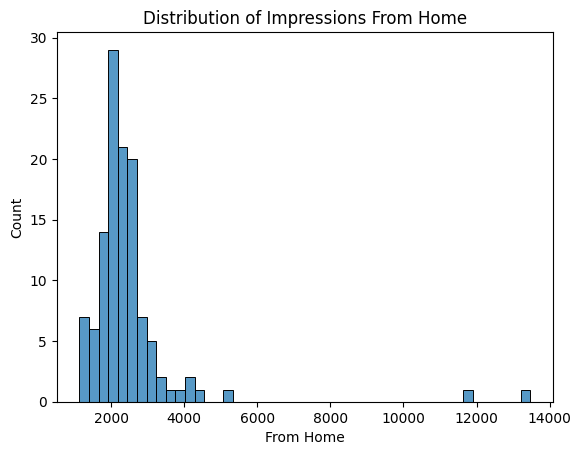

In [12]:
plt.title("Distribution of Impressions From Home")
sns.histplot(df['From Home'])
plt.show()

# Impression

- The impressions I get from the home section on Instagram shows how much my posts reach my followers.

- Looking at the impressions from home, I can say it’s hard to reach all my followers daily.

- Now let’s have a look at the distribution of the impressions I received from hashtags:

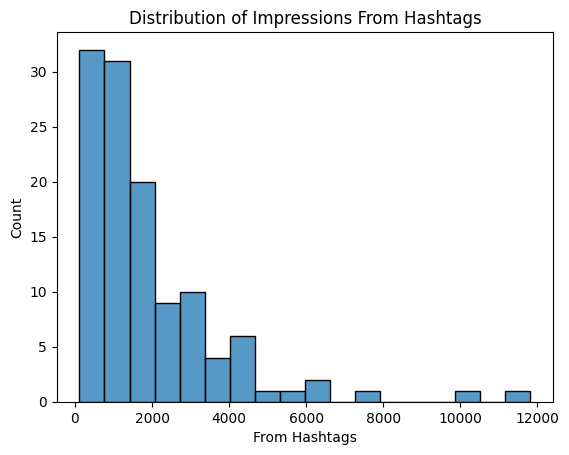

In [13]:
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(df['From Hashtags'])
plt.show()

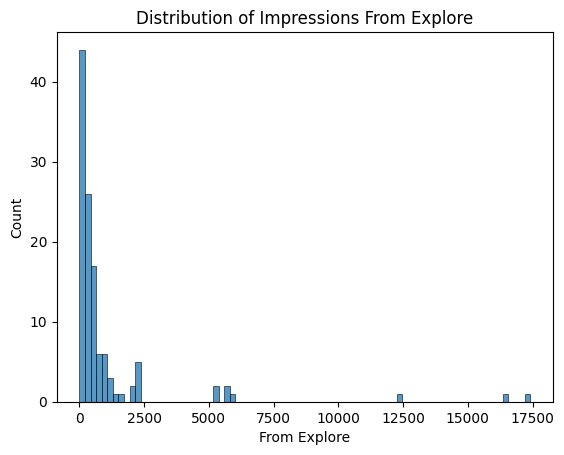

In [14]:
plt.title("Distribution of Impressions From Explore")
sns.histplot(df['From Explore'])
plt.show()

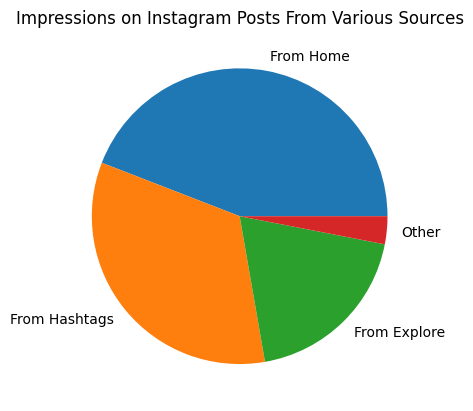

In [15]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
plt.pie(values, labels=labels)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.show()

**So the above donut plot shows that almost 44.1 percent of the reach is from my followers, 33.6 percent is from hashtags, 19.2 percent is from the explore section, and 3.0 percent is from other sources.**

# Analyzing Relationships

- Let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

- Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

In [16]:
lr = LinearRegression()

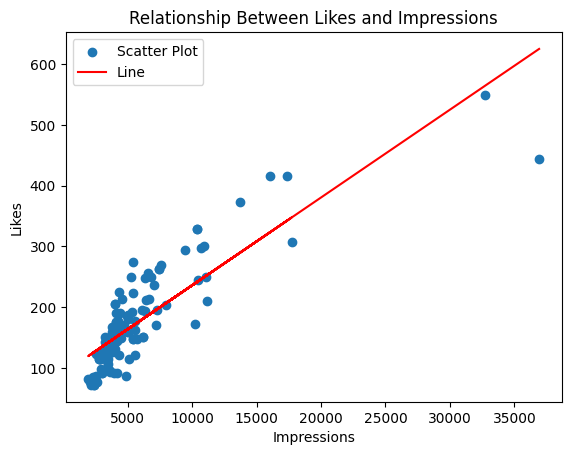

In [17]:
lr.fit(df[["Impressions"]], df["Likes"])
plt.scatter(df["Impressions"], df["Likes"], label="Scatter Plot")
plt.title("Relationship Between Likes and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Likes")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Impressions"], m * df["Impressions"] + c, color="red", label="Line")
plt.legend()
plt.show()

- There is a linear relationship between the number of likes and the reach I got on Instagram.

- Let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

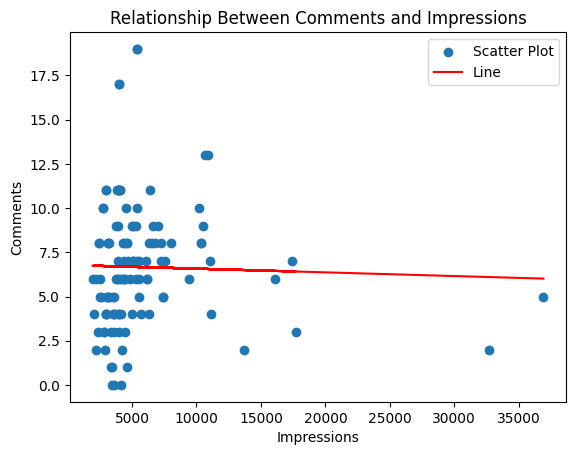

In [18]:
lr.fit(df[["Impressions"]], df["Comments"])
plt.scatter(df["Impressions"], df["Comments"], label="Scatter Plot")
plt.title("Relationship Between Comments and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Comments")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Impressions"], m * df["Impressions"] + c, color="red", label="Line")

plt.legend()
plt.show()

- It looks like the number of comments we get on a post doesn’t affect its reach.

- Let’s have a look at the relationship between the number of shares and the number of impressions:

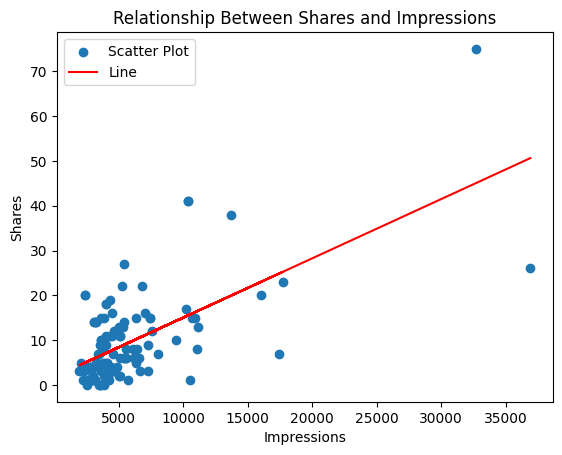

In [19]:
lr.fit(df[["Impressions"]], df["Shares"])
plt.scatter(df["Impressions"], df["Shares"], label="Scatter Plot")
plt.title("Relationship Between Shares and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Shares")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Impressions"], m * df["Impressions"] + c, color="red", label="Line")

plt.legend()
plt.show()

- There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

- Let’s have a look at the correlation of all the columns with the Impressions column:

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


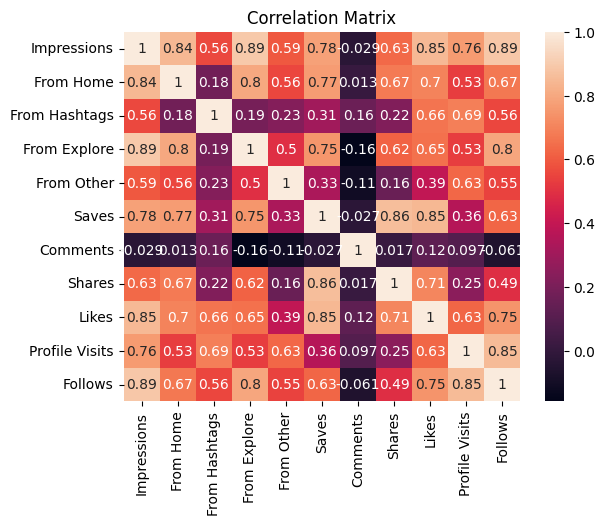

In [20]:
correlation = df.corr(numeric_only = True)
print(correlation["Impressions"].sort_values(ascending=False))
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.title('Correlation Matrix')
plt.show()

# Analyzing Conversion Rate

- In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post.

- The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:


In [21]:
conversion_rate = (df["Follows"].sum()/df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


- So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate.

- Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

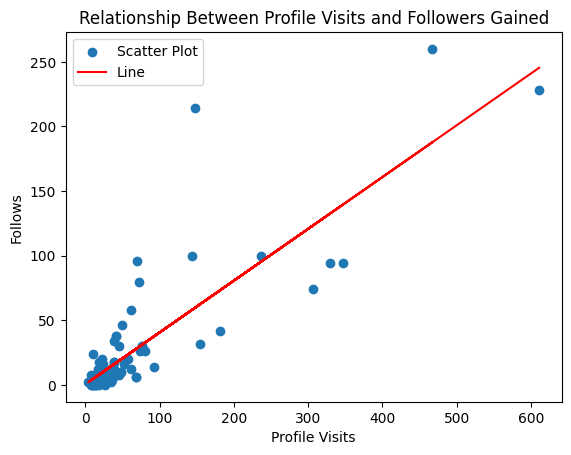

In [22]:
lr = LinearRegression()
lr.fit(df[["Profile Visits"]], df["Follows"])
plt.scatter(df["Profile Visits"], df["Follows"], label="Scatter Plot")
plt.title("Relationship Between Profile Visits and Followers Gained")
plt.xlabel("Profile Visits")
plt.ylabel("Follows")

#y=mx+c
m = lr.coef_[0]
c = lr.intercept_
plt.plot(df["Profile Visits"], m * df["Profile Visits"] + c, color="red", label="Line")

plt.legend()
plt.show()

#### The relationship between profile visits and followers gained is also linear.

In [23]:
X = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression

In [25]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

y_pred = lr.predict(X_test)

print("Linear Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

0.8777977785012779
Linear Regression Model:
Mean Squared Error: 4746059.117340453
R-squared: 0.8777977785012779


#Ridge Regression

In [26]:
ridge = Ridge()
ridge.fit(X_train, y_train)
print(ridge.score(X_test, y_test))

y_pred = ridge.predict(X_test)

print("Ridge Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

0.8778230917754097
Ridge Regression Model:
Mean Squared Error: 4745076.006771683
R-squared: 0.8778230917754097


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Polynomial Features

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

In [29]:
#Polynomial Linear Regression
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)
y_pred_lr_poly = lr_poly.predict(poly.transform(X_test_scaled))

print("Polynomial Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr_poly))
print("R² score:", r2_score(y_test, y_pred_lr_poly))

Polynomial Linear Regression
Mean Squared Error: 17290597.69433918
R² score: 0.554799171892119


In [30]:
#Polynomial Ridge Regression
ridge_poly = Ridge()
ridge_poly.fit(X_poly, y_train)
y_pred_ridge_poly = ridge_poly.predict(poly.transform(X_test_scaled))
print("\nPolynomial Ridge Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge_poly))
print("R² score:", r2_score(y_test, y_pred_ridge_poly))


Polynomial Ridge Regression
Mean Squared Error: 2369897.905692059
R² score: 0.9389795235077002
